# COMP9318 Lab1

## Instructions
1. This note book contains instructions for COMP9318-lab1.

* You are required to complete your implementation in a seperate file `submission.py` provided along with this notebook.

* You are not allowed to print out unnecessary stuff. We will not consider any output printed out on the screen. All results should be returned in appropriate data structures return by corresponding functions.

* Submission instructions for **lab1** will be emailed to all students within 1-2 days.

* For each question, we have provided you with detailed instructions along with question headings. In case of any problem, you can post your query @ Piazza.

* If you choose to skip a question, leave the corresponding function body as it is (i.e., keep the `pass` line), otherwise it may affect your mark for other questions.

* You are allowed to add other functions and/or import additional modules (you may have to in this lab), but you are not allowed to define global variables. **Only functions are allowed** in `submission.py`. 

* You should not import unnecessary modules/libraries, failing to import such modules at test time will lead to errors.

* We will provide immediate feedback on your submission. You can access your scores using the online submission portal on the same day. However, for **Final Evaluation** we will be using a different dataset, so your final scores may vary.  

* You are allowed to submit as many times as you want before the deadline, but **ONLY the latest version will be kept and marked**.

* Submission deadline for this assignment is **23:59:59 on 20th March, 2018**. We will **not accept any late submissions.

# Question 0: An example (0 point)

In this section, we illustrate the steps needed to complete this notebook and prepare the file `submission.py`. As an example, you are required to implement a function that takes two arguments `a` and `b`, and outputs their sum.


You will be provided with the definition of the function as given below:

In [1]:
def add(a, b): # do not change the heading of the function
    pass # **replace** this line with your code

**Step 1**: You need to write your implementation in the function body like below **(you should remove the `pass` line from the function body)**:

In [2]:
def add(a, b): # do not change the heading of the function
    return a + b

**Step 2**: you need to paste your code to **`submission.py`**, which originally contains only function definitions. As an example, we have done the Question 0 for you.

# Question 1: Integer square root of an integer (25 points)

You need to write a function, `nsqrt()`, that takes as input an integer `x`, and return the largest integer that does not exceed $\sqrt{x}$. You need to abide by the following constraints:
1. The time complexity of your algorithm should be $O(\log x)$. 
2. You cannot use `sqrt()` function. 

For example, `nsqrt(11) = 3`, and `nsqrt(1369) = 37`. 


In [3]:
def nsqrt(x): # do not change the heading of the function
    pass # **replace** this line with your code

you can test your implementation using the following code.

In [5]:
import submission as submission
print(submission.nsqrt(11), submission.nsqrt(1369))

3 37


# Question 2: Finding a root (25 points)

Use Newton's method to find a root of an equation numerically. Newton's method starts from $x_0$ and iteratively computes $$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

We plot the equation below (for x > 0)


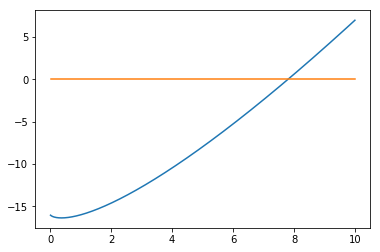

In [6]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


def f(x):
    return x * math.log(x) - 16.0

xvals = np.arange(0.01, 10, 0.01)        
yvals = np.array([f(x) for x in xvals])
plt.plot(xvals, yvals) 
plt.plot(xvals, 0*xvals)
plt.show()

Let us consider find a $x$ such that $f(x) = x \ln(x) - 16 = 0$. 

Here, $f'(x) = (x \cdot \frac{1}{x} + 1 \cdot \ln(x)) + 0 = 1 + \ln(x)$. 

we denoted it as `fprime(x)`:

In [7]:
def fprime(x):
    return 1.0 + math.log(x)

You need to implement Newton's method below. <br>
* NOTE: you must use the default values of the mentioned parameters, **do not change them**

In [8]:
## We will be using following parameters:
# x_0: initial guess
# EPSILON: stop when abs(x - x_new) < EPSILON
# MAX_ITER: maximum number of iterations


def find_root(f, fprime, x_0=1.0, EPSILON = 1E-7, MAX_ITER = 1000): # do not change the heading of the function
    pass # **replace** this line with your code

You can test your implementation using the following code.

* Note that we will evaluate your submission with a different function, i.e., $f(x)$. If you want to change it during your implementation, you should also change $f'(x)$ accordingly.

In [9]:
import submission as submission

x = submission.find_root(f, fprime)
print(x)
print(f(x))

7.792741452820329
0.0


# Question 3: Trees (25 + 25 points)

In this question, you need to perform following tasks: 
1. Build a tree from a string, which represents the pre-order traversal of the tree. 
2. Compute the max depth of the tree. 

We provide you with the following `Tree` class, and a helper function which parses the string and returns an array of tokens.

In [10]:
# Note: You need to pay attention to how to determine whether a node is a leaf node in this implementation. 
class Tree(object):
    def __init__(self, name='ROOT', children=None):
        self.name = name
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
    def __repr__(self):
        return self.name
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)

The following code demonstrates basic use of the class. 

In [11]:
t = Tree('*', [Tree('1'),
               Tree('2'),
               Tree('+', [Tree('3'),
                          Tree('4')])])


In [12]:
def print_tree(root, indent=0):
    print(' ' * indent, root)
    if len(root.children) > 0:
        for child in root.children:
            print_tree(child, indent+4)

In [13]:
print_tree(t)

 *
     1
     2
     +
         3
         4


Here is the helper function `str_to_tokens`, and its sample usage. 

In [14]:
import re

def myfind(s, char):
    pos = s.find(char)
    if pos == -1: # not found
        return len(s) + 1
    else: 
        return pos

def next_tok(s): # returns tok, rest_s
    if s == '': 
        return (None, None)
    # normal cases
    poss = [myfind(s, ' '), myfind(s, '['), myfind(s, ']')]
    min_pos = min(poss)
    if poss[0] == min_pos: # separator is a space
        tok, rest_s = s[ : min_pos], s[min_pos+1 : ] # skip the space
        if tok == '': # more than 1 space
            return next_tok(rest_s)
        else:
            return (tok, rest_s)
    else: # separator is a [ or ]
        tok, rest_s = s[ : min_pos], s[min_pos : ]
        if tok == '': # the next char is [ or ]
            return (rest_s[:1], rest_s[1:])
        else:
            return (tok, rest_s)
        
def str_to_tokens(str_tree):
    # remove \n first
    str_tree = str_tree.replace('\n','')
    out = []
    
    tok, s = next_tok(str_tree)
    while tok is not None:
        out.append(tok)
        tok, s = next_tok(s)
    return out

In [15]:
# format: node, list-of-children
str_tree = '''
1 [2 [3 4       5          ] 
   6 [7 8 [9]   10 [11 12] ] 
   13
  ]
'''
toks = str_to_tokens(str_tree)
print(toks)

['1', '[', '2', '[', '3', '4', '5', ']', '6', '[', '7', '8', '[', '9', ']', '10', '[', '11', '12', ']', ']', '13', ']']


## Question 3-1 (25 points)
Now you need to implement the function `make_tree(tokens)`, which receives tokens formatted like `toks` above and returns a `Tree` object. 

In [16]:
def make_tree(tokens): # do not change the heading of the function
    pass # **replace** this line with your code    

You can test your implementation using the following code.

In [17]:
import submission as submission
tt = submission.make_tree(toks)
print_tree(tt)

 1
     2
         3
         4
         5
     6
         7
         8
             9
         10
             11
             12
     13


## Question 3-2 (25 points)
Now you need to implement the `max_depth(root)` function, which receives the root of the tree and returns the max depth of the tree. 

For the given sample tree string, the max depth is 4. 

In [20]:
def max_depth(root): # do not change the heading of the function
    pass # **replace** this line with your code

You can test your implementation using the following code.

In [21]:
import submission as submission
depth = submission.max_depth(tt)
print(depth)

4
